## Bibliotheken importieren

In [11]:
import csv
import functools
import matplotlib.pyplot as plt

## Dateipfad und Variablen festlegen

- Die field_size_limit-Funktion wird erhöht, damit mit der kompletten CSV-Datei gearbeitet werden kann.
- Die Liste zahlen wird verwendet, um die eingelesenen Zahlen aus der CSV-Datei zu speichern.

In [12]:
file_path = "C:\\Users\\bfues\\Desktop\\info\\4.Semester\\Big data\\Praktikum\\P.csv"
csv.field_size_limit(2**22)
zahlen = []

## Aufgabe 1.b)
## CSV-Daten einlesen

 - Die CSV-Datei wird geöffnet und zeilenweise eingelesen.
 - Jede Zeile wird mit map in Integer-Werte konvertiert und der Liste "Zahlen" hinzugefügt.

In [13]:
with open(file_path, "r") as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        zahlen.extend(map(int, row))

## Reducer-Funktion
 
- Die Reducer-Funktion wird von der functools.reduce-Funktion aufgerufen, um die Häufigkeiten der Zahlen in der Liste "zahlen" zu zählen.
- Sie nimmt zwei Dictionaries (lhs und rhs) als Eingabe, die jeweils die Häufigkeit einer Zahl in der Liste repräsentieren.
- Die Funktion kombiniert die beiden Dictionaries, indem sie die Häufigkeiten für identische keys(Zahlen) addiert beziehungsweise die Häufigkeit mit der Zahl 1 aufsummiert.
- Wenn ein Schlüssel (Zahl) im lhs noch nicht vorhanden ist, wird er mit dem Wert aus rhs, in diesem Fall 1 initialisiert.

In [14]:
def reducerForReduce(lhs, rhs):
    for k, v in rhs.items():
        if k in lhs:
            lhs[k] += v
        else:
            lhs[k] = v
    return lhs

## Funktion f

- Die Funktion f erstellt für jede eingelesene Zahl ein Dictionary mit dem Schlüssel als Zahl und dem Wert 1.
- Dieses Dictionary repräsentiert das Vorkommen der jeweiligen Zahl in der Liste.

In [15]:
def f(number):
    result = {}
    result[number] = 1
    return result

## Anwendung der F-Funktion auf die Liste "zahlen"

- Die Funktion "f" wird auf die gesamte Liste "zahlen" angewendet mit map und gibt eine Liste von Dictionaries zurück

In [16]:
mapped_numbers = list(map(f, zahlen))

## Berechnung der tatasächlichen Häufigkeit der Zahlen 

- reduce Funktion verwendet die reducerForReduce Funktion um dictionary zu erstellen, dass das Vorkommen jeder Zahl in der Liste "zahlen" enthält

In [17]:
res = functools.reduce(reducerForReduce, mapped_numbers)

## Ausgabe der sortierten Zahlen
- Die postProcess-Funktion nimmt das resultierende Dictionary als Eingabe und gibt die sortierten Zahlen und ihre Häufigkeiten aus.

In [18]:
def postProcess(zahlen):
    print("Number\tCount")
    for k in sorted(zahlen.keys()):
        print(f"{k}\t{zahlen[k]}")

postProcess(res)

Number	Count
-463	1
-396	2
-393	1
-392	1
-383	1
-380	1
-378	1
-377	1
-374	1
-373	1
-368	1
-367	1
-365	3
-362	1
-361	1
-360	1
-355	2
-353	3
-352	1
-351	1
-350	1
-348	2
-346	1
-345	2
-342	2
-339	3
-337	3
-336	1
-335	2
-333	2
-331	2
-330	1
-329	2
-327	1
-326	2
-325	3
-324	1
-323	2
-321	1
-320	4
-319	2
-318	2
-317	3
-316	5
-315	5
-314	3
-313	2
-312	2
-311	4
-310	2
-309	5
-308	4
-307	2
-306	2
-305	3
-304	6
-303	2
-302	3
-301	3
-300	3
-299	7
-298	5
-297	8
-296	7
-295	6
-294	5
-293	5
-292	8
-291	3
-290	4
-289	4
-288	6
-287	8
-286	6
-285	7
-284	4
-283	6
-282	5
-281	4
-280	11
-279	6
-278	9
-277	3
-276	12
-275	8
-274	9
-273	11
-272	8
-271	13
-270	8
-269	10
-268	14
-267	10
-266	4
-265	17
-264	15
-263	18
-262	12
-261	12
-260	15
-259	7
-258	17
-257	14
-256	9
-255	13
-254	15
-253	12
-252	21
-251	14
-250	19
-249	13
-248	16
-247	21
-246	21
-245	21
-244	19
-243	27
-242	18
-241	22
-240	20
-239	23
-238	19
-237	22
-236	36
-235	26
-234	32
-233	27
-232	26
-231	37
-230	28
-229	28
-228	33
-227	35
-226	28
-225

## Aufgabe 1.c) Visualisierung der Ergebnisse

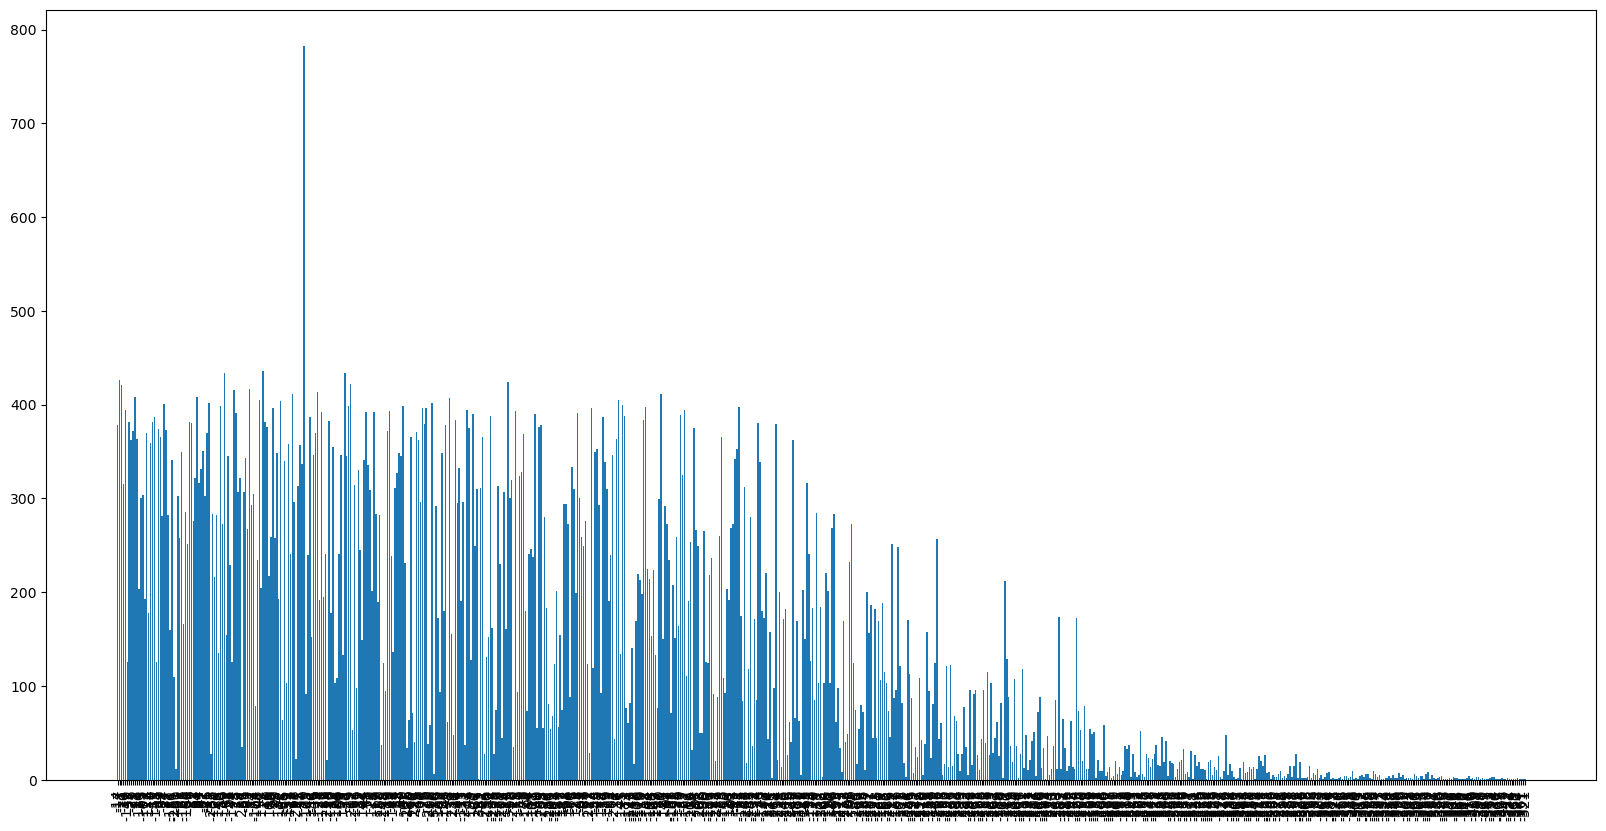

In [19]:
plt.figure(figsize=(20, 10))
plt.bar(range(len(res)), res.values(), align='center')
plt.xticks(range(len(res)), res.keys(), rotation=90)
plt.show()